# Identificação do Uso e Cobertura da Terra com Redes Neurais: Explorando o Conjunto de Dados EuroSAT 🗺️

**Nome: Gabriel Santos Costa** | **Matrícula: 2311100036**

O seguinte projeto foi desenvolvido como parte da avaliação proposta pelo professor Giancarlo Dondoni Salton para a disciplina de Redes Neurais. Ele tem como objetivo a compreensão de como se dá o processo de treinamento de uma rede neural artificial (RNA) e a preparação do dataset para treiná-la.

Link do dataset escolhido: https://www.tensorflow.org/datasets/catalog/eurosat?hl=pt-br

O conjunto de dados EuroSAT é baseado em imagens de satélite Sentinel-2 cobrindo 13 bandas espectrais e consistindo em 10 classes com 27.000 amostras rotuladas e georreferenciadas.

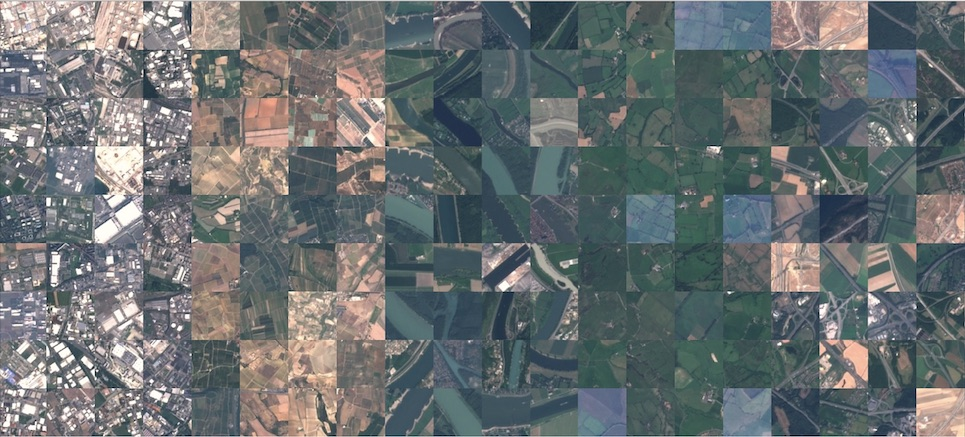

Iniciei instalando o rasterio (biblioteca em Python para leitura e escrita de dados geoespaciais em formatos raster, como imagens e dados de sensoriamento remoto.)

In [1]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 14.8 MB/s eta 0:00:00


Faço a conexão com o Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importo libs e functions que serão usadas:

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import pandas as pd
from pylab import rcParams
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 18, 6
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Seto o caminho do dataset para a variável path e logo uso a função do os para listar os diretórios dentro de path, colocando na variável class_list

In [4]:
path = 'drive/My Drive/EuroSat'

In [5]:
class_list = os.listdir(path)

Listagem das classes no conjunto de dados:

In [6]:
print(class_list)

['AnnualCrop', 'River', 'SeaLake', 'Pasture', 'Industrial', 'HerbaceousVegetation', 'Highway', 'PermanentCrop', 'Residential', 'Forest']


Crio a variável X para receber as imagens e a variável Y para receber as respectivas classes

In [7]:
# Y = []
# X = []
# i = 0
# for i in range(len(class_list)):
#   path_class = os.path.join(path,class_list[i])
#   img_list = os.listdir(path_class)
#   for n in range(len(img_list)):
#     path_img = os.path.join(path_class,img_list[n])
#     src = rasterio.open(path_img)
#     im = src.read()
#     im = im.transpose([1,2,0])
#     im1 = im[:,:,1:9]
#     im2 = im[:,:,11:]
#     im = np.dstack((im1,im2))
#     #im = im.astype('uint8')
#     print(str(n) + '_' + class_list[i])
#     Y.append(i)
#     X.append(im)
import os
import rasterio
import numpy as np

Y = []
X = []

for classe in class_list:
    path_class = os.path.join(path, classe)
    img_list = os.listdir(path_class)

    for n, img_name in enumerate(img_list):
        path_img = os.path.join(path_class, img_name)
        src = rasterio.open(path_img)
        im = src.read().transpose([1, 2, 0])
        im1 = im[:, :, 1:9]
        im2 = im[:, :, 11:]
        im = np.dstack((im1, im2))

        # Se necessário, converter para 'uint8'
        # im = im.astype('uint8')

        print(str(n) + '_' + classe)
        Y.append(class_list.index(classe))  # Ou usar um dicionário para mapear classes para índices
        X.append(im)


A saída de streaming foi truncada nas últimas 5000 linhas.
568_Highway
569_Highway
570_Highway
571_Highway
572_Highway
573_Highway
574_Highway
575_Highway
576_Highway
577_Highway
578_Highway
579_Highway
580_Highway
581_Highway
582_Highway
583_Highway
584_Highway
585_Highway
586_Highway
587_Highway
588_Highway
589_Highway
590_Highway
591_Highway
592_Highway
593_Highway
594_Highway
595_Highway
596_Highway
597_Highway
598_Highway
599_Highway
600_Highway
601_Highway
602_Highway
603_Highway
604_Highway
605_Highway
606_Highway
607_Highway
608_Highway
609_Highway
610_Highway
611_Highway
612_Highway
613_Highway
614_Highway
615_Highway
616_Highway
617_Highway
618_Highway
619_Highway
620_Highway
621_Highway
622_Highway
623_Highway
624_Highway
625_Highway
626_Highway
627_Highway
628_Highway
629_Highway
630_Highway
631_Highway
632_Highway
633_Highway
634_Highway
635_Highway
636_Highway
637_Highway
638_Highway
639_Highway
640_Highway
641_Highway
642_Highway
643_Highway
644_Highway
645_Highway
646_H

Após importar os dados, converto as variáveis para numpy arrays:

In [8]:
X = np.array(X)
Y = np.array(Y)

Visualizar shape dos dados

In [9]:
print(X.shape)
print(Y.shape)

(13610, 64, 64, 10)
(13610,)


Não entendo o motivo após converter as variáveis para numpy elas terem metade do tamanho de dados do dataset, não entendo se foi erro ao passar para X e Y no código acima ou outra coisa. Isso ocasionou na divisão do dataset pela metade a partir daqui

Plotando um exemplo aleatório do dataset:

(-0.5, 63.5, 63.5, -0.5)

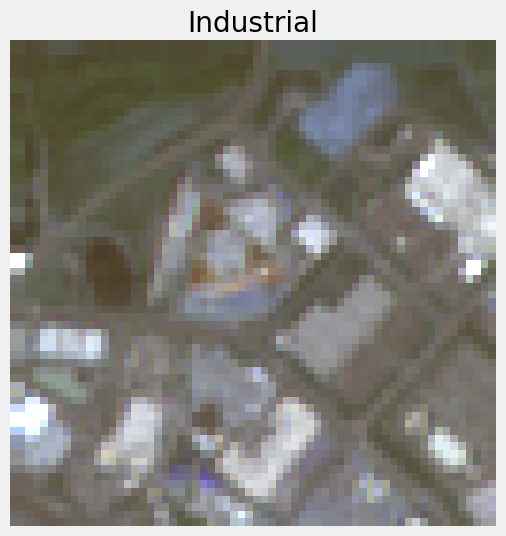

In [10]:
plt.figure(figsize=[6,6])
plt.title(class_list[Y[4000]])
plt.imshow(X[4000,:,:,0:3]/3000)
plt.axis('off')

Verificando quantidade de amostras por classe através de um gráfico de barras:

In [11]:
classe, qtd =  np.unique(Y,return_counts=True)

[3094 1938 3010 2520 3048]
[0 0 0 ... 9 9 9]


In [12]:
df = pd.DataFrame(data=qtd, index=classe, columns=['Amostras'])

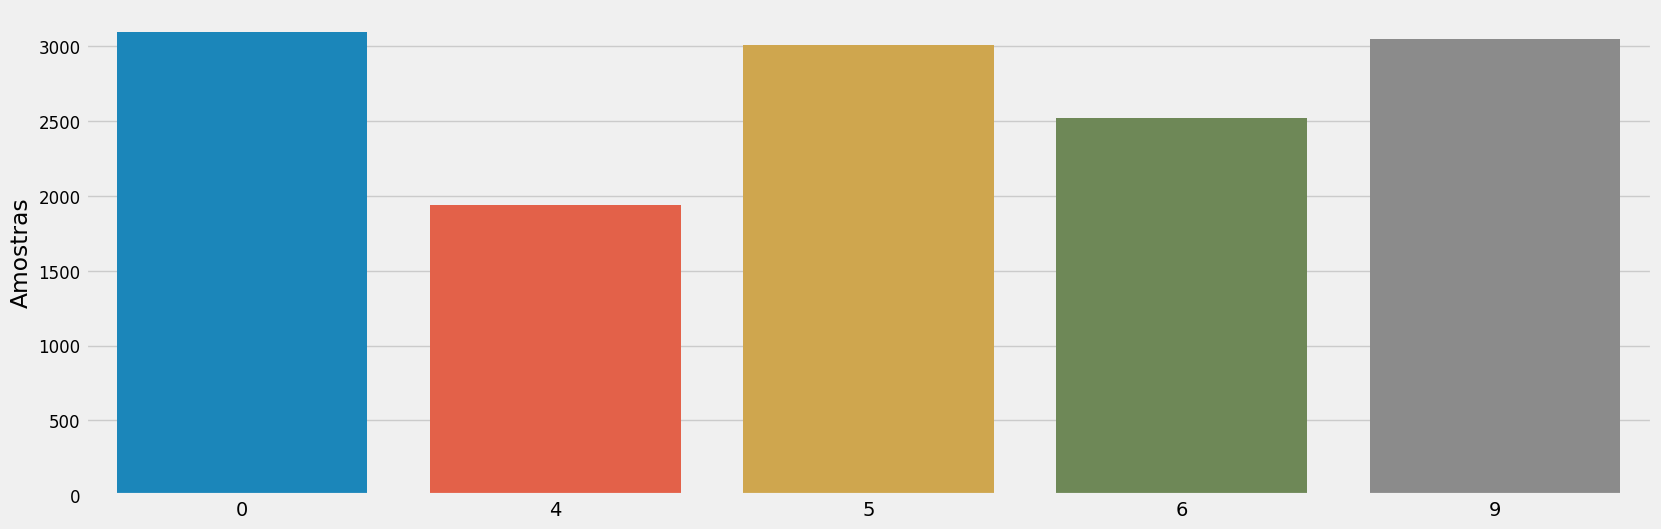

In [13]:
ax = sns.barplot(x= df.index,y="Amostras", data=df)

Importação de funções Keras

In [14]:
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.activations import relu
from keras.losses import binary_crossentropy
from keras import backend as K
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import keras.utils as np_utils

Converto a variável Y (valores das classes) para uma representação categórica com valores entre 0 e 1:

In [16]:
Y = np_utils.to_categorical(Y)
Y.shape

(13610, 10)

Separo os dados em teste e treinamento:

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [18]:
print(x_train.shape)
print(x_test.shape)

(9527, 64, 64, 10)
(4083, 64, 64, 10)


In [19]:
print(y_train.shape)
print(y_test.shape)

(9527, 10)
(4083, 10)


É preciso dividir os valores de pixel brutos para colocar em um intervalo entre 0 e 1. Primeiro com o conjunto de teste e depois com o conjunto de treinamento:

In [20]:
x_test = x_test/10000.0

In [21]:
x_train = x_train/10000.0

In [22]:
x_train.shape[1:]

(64, 64, 10)

Liberar memória RAM para nao reiniciar GPU caso estoure

In [23]:
del X
del Y

Construção das camadas da rede convolucional utilizando o Keras

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

Model = Sequential()

Model.add(Conv2D(16, (3, 3), kernel_initializer="he_normal", padding='same', input_shape=(x_train.shape[1:])))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

Model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", padding='same'))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

Model.add(Conv2D(64, (3, 3), kernel_initializer="he_normal", padding='same'))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

Model.add(Conv2D(128, (3, 3), kernel_initializer="he_normal", padding='same'))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

Model.add(Flatten())
Model.add(Dropout(0.4))

Model.add(Dense(128))
Model.add(Activation('relu'))

Model.add(Dense(10))
Model.add(Activation('softmax'))

Model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])
Model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        1456      
                                                                 
 activation (Activation)     (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                   

Treinamento da rede:

In [25]:
history = Model.fit(x = x_train, y= y_train, batch_size=16, epochs=50, verbose=1, shuffle=True, validation_split=0.2)

Epoch 1/50
477/477 [==============================] - 14s 13ms/step - loss: 0.6145 - accuracy: 0.7603 - val_loss: 0.3740 - val_accuracy: 0.8505
Epoch 2/50
477/477 [==============================] - 4s 8ms/step - loss: 0.3041 - accuracy: 0.8882 - val_loss: 0.3742 - val_accuracy: 0.8694
Epoch 3/50
477/477 [==============================] - 3s 7ms/step - loss: 0.2658 - accuracy: 0.9037 - val_loss: 0.2467 - val_accuracy: 0.8987
Epoch 4/50
477/477 [==============================] - 4s 8ms/step - loss: 0.1984 - accuracy: 0.9276 - val_loss: 0.1728 - val_accuracy: 0.9292
Epoch 5/50
477/477 [==============================] - 5s 10ms/step - loss: 0.1636 - accuracy: 0.9408 - val_loss: 0.1805 - val_accuracy: 0.9276
Epoch 6/50
477/477 [==============================] - 3s 7ms/step - loss: 0.1538 - accuracy: 0.9433 - val_loss: 0.1618 - val_accuracy: 0.9475
Epoch 7/50
477/477 [==============================] - 4s 8ms/step - loss: 0.1301 - accuracy: 0.9530 - val_loss: 0.1416 - val_accuracy: 0.9544
Epo

Gráficos de acurácia e perda por iterações:

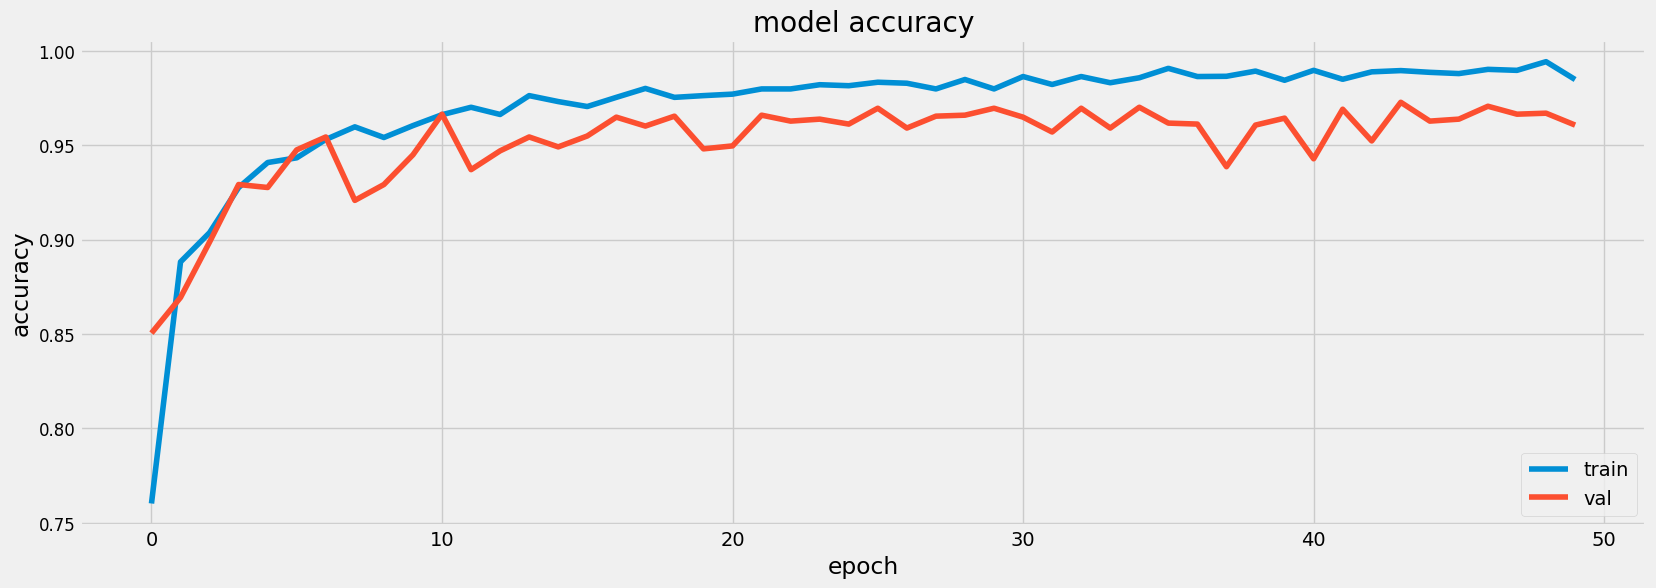

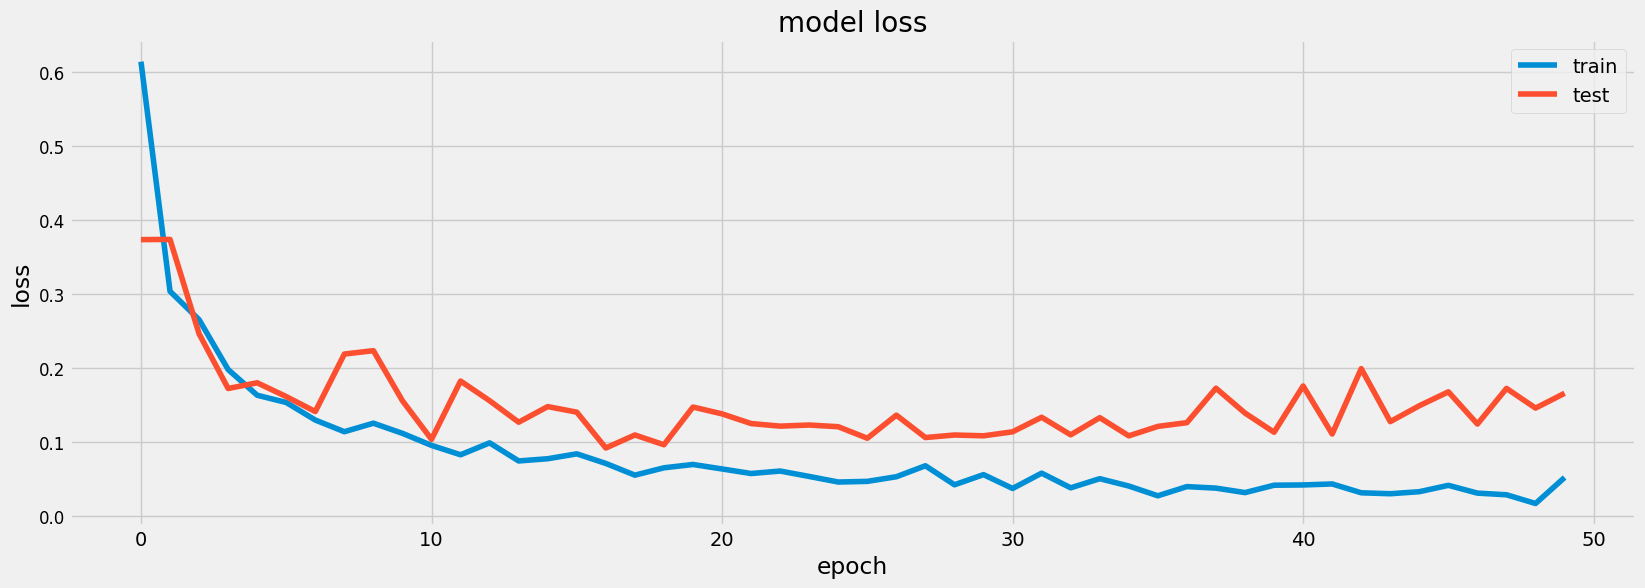

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Agora realizo a predição das classes das imagens do dataset que separei para teste

In [27]:
predict = Model.predict(x_test)

128/128 [==============================] - 1s 8ms/step


In [28]:
pred = np.argmax(predict, axis=1)

In [29]:
true = np.argmax(y_test, axis=1)

Acurácia global dos dados de teste

In [30]:
accuracy = accuracy_score(true,pred)
print(accuracy)

0.9608131276022532


Uso de classification report para ver algumas métricas por classe:

In [34]:
print(classification_report(true, pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       920
           4       0.93      0.99      0.96       610
           5       0.93      0.98      0.95       893
           6       0.97      0.92      0.94       781
           9       0.99      0.97      0.98       879

    accuracy                           0.96      4083
   macro avg       0.96      0.96      0.96      4083
weighted avg       0.96      0.96      0.96      4083



Matriz de confusão pra ver como as amostras estão sendo classificadas de acordo com as classes pré-definidas.

In [35]:
cm = confusion_matrix(true, pred)
print(cm)

[[877   0  33   4   6]
 [  0 601   0   9   0]
 [  5   2 875   9   2]
 [ 12  43  11 715   0]
 [  2   0  22   0 855]]


Text(0.5, 26.583333333333286, 'Predito')

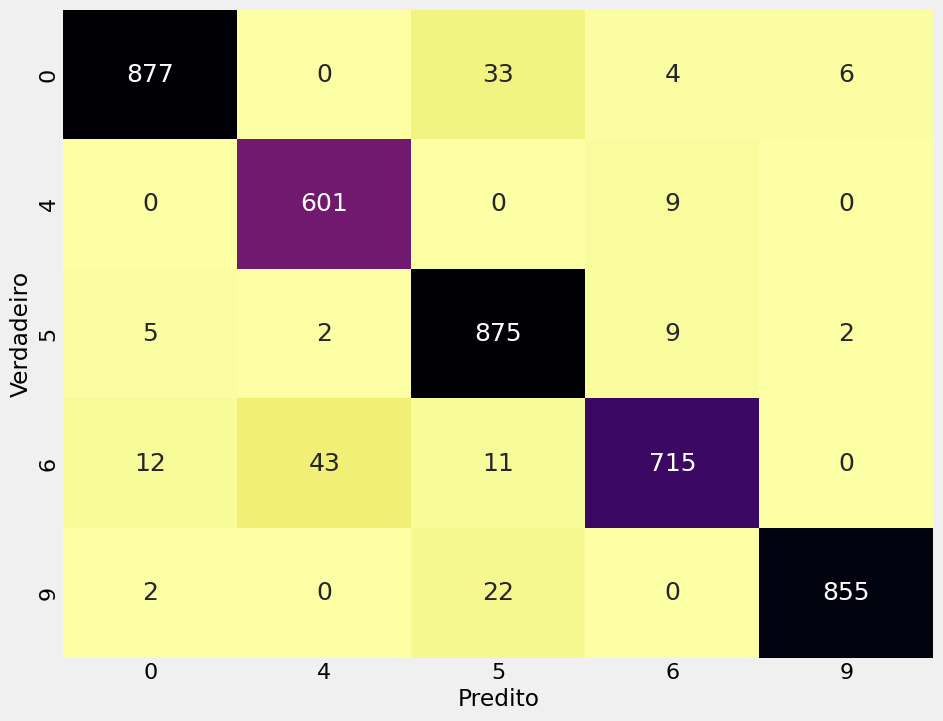

In [33]:
columns = class_list
r1 = pd.DataFrame(data=cm, columns=classe, index=classe)
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(r1, annot=True, annot_kws={"size": 18},fmt='d',cmap="inferno_r", cbar = False)
#for t in ax.texts: t.set_text(t.get_text() + " %")
ax.tick_params(labelsize=16)
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Predito')